<div class="alert alert-block alert-success">
<b>to do:</b>
    <BR> &#9730; Data description as appendix?
    <BR> &#9730; something with sunburst?
    <BR> &#9730; Add explenations for every step
    <BR> &#9730; Add theoretical background on every model 
</div>

<div id=header class="alert alert-block alert-info">
<b>Final Project For Course 236502001 - כלים טכנולוגיות קוד פתוח למערכות תבוניות </b>
        <BR>Presented By:
        <BR>&emsp;1. Tali Presaizen 123456789
        <BR>&emsp;2. Mor Atiya 123456789
        <BR>&emsp;3. Amir Yorav 123456789
    <BR>Kaggle user: <a href=”https://www.google.com">KKK</a></div>

 # Table of Contents  
1. [Introduction](#Introduction)   
    1. [Data Set Description](#Data-Set-Description)  
    1. [Variable Description](#Variable-Description) 
1. [Imports](#-Imports) 
1. [Exploring The Data](#Exploring-The-Data) 
    1. [Loading](#Loading) 
    1. [Missing Values](#Missing-Values)
    1. [Variable Correlations](#Variable-Correlations)
    1. [Target Variable](#Target-Variable)
    1. [Outliers](#Outliers)
1. [Prepering Data for models](#Prepering-Data-for-models)     
    1. [Encoding](#Encoding)
    1. [Splitting the Data](#Splitting-the-Data)   
    1. [Feature Scaling](#Feature-Scaling) 
1. [Feature Selection](#-Feature-Selection)
    1. [Ridge-Lasso-Elasticnet](#Ridge-Lasso-Elasticnet) 
    1. [Trees](#Trees) 
    1. [PCA](#PCA)
1. [SGD Model](#SGD-Model)     
    1. [Tune Hyper Parameters](#SGD---Tune-Hyper-Parameters)
    1. [Evaluating on Validation set](#SGD---Evaluating-on-Validation-set)
    1. [Model Submission](#SGD---Model-Submission)     
1. [Random Forest Model](#Random-Forest-Model)     
    1. [Tune Hyper Parameters](#RF---Tune-Hyper-Parameters)
    1. [Evaluating on Validation set](#RF---Evaluating-on-Validation-set)     
    1. [Model Submission](#RF-Model-Submission) 
1. [Model TTT](#Model-TTT)     
    1. [Tune Hyper Parameters](#TM---Tune-Hyper-Parameters)   
    1. [Evaluating on Validation set](#TM---Evaluating-on-Validation-set)     
    1. [Submission](#TM---Submission) 
1. [Ensemble of the Models](#Ensemble-of-the-Models)     
    1. [Create Ensemble](#Create-Ensemble)    
    1. [Evaluating on Validation set](#Evaluating-on-Validation-set)     
1. [Final Submission](#Conclusions) 
1. [Conclusions](#Conclusions) 
1. [References](#References)    

<table id=Introduction style="width:100%">
<tr><td><h1>Introduction</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

### Data Set Description

### Variable Description

<table id=-Imports style="width:100%">
<tr><td><h1>Imports</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table> 

In [1]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# define plt settings
plt.rcParams["font.size"] = 8
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["figure.figsize"] = (5,5)
%matplotlib inline

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

#for some statistics
from scipy.stats import uniform
from scipy import stats
from scipy.stats import norm, skew 

<table id=Exploring-The-Data style="width:100%">
<tr><td><h1>Exploring The Data</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

### Loading

In [2]:
train_data = pd.read_csv("Data/train.csv")
test_data = pd.read_csv("Data/test.csv")

In [3]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
train_data.shape

(1460, 81)

In [5]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


<div class="alert alert-block alert-success">
We see that <strong>test</strong> have all the columns except the <strong>'SalePrice'</strong> which is our target
</div>

In [6]:
# concat all data so we can make all the preprocessing on all
target = train_data['SalePrice']
all_data = pd.concat([train_data.drop('SalePrice',axis=1), test_data])

In [7]:
all_data.shape

(2919, 80)

---

 #### visual reports

from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
dft = AV.AutoViz("", depVar='SalePrice', dfte=train_data, verbose=2)

 Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
       verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.

import sweetviz as sv
analyze_report = sv.analyze(train_data)
analyze_report.show_html()

---

In [8]:
all_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

### Missing Values

In [10]:
# find missing data percentage for each column
def find_missing(df):
    df_na =(df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_df = pd.DataFrame({'Missing Data' :df_na})
    return missing_df

<div class="alert alert-block alert-warning">
<h1><b>Q: </b>do we need to remove features with very high missing data %? </h1>
</div>


In [11]:
na_data = find_missing(all_data)
na_data

,Missing Data
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071
GarageYrBlt,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

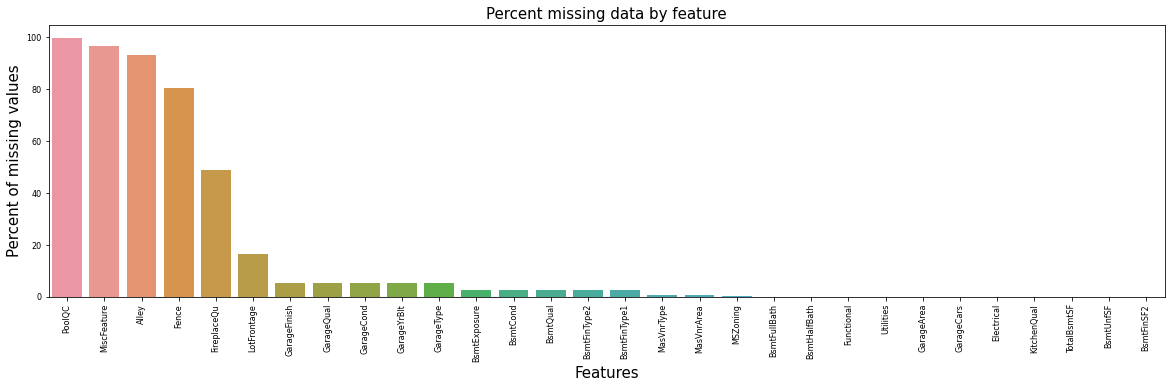

In [12]:
f, ax = plt.subplots(figsize=(20, 5))
plt.xticks(rotation='90')
sns.barplot(x=na_data.index, y=na_data['Missing Data'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

In [13]:
#PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
#MiscFeature : data description says NA means "no misc feature"
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
#Alley : data description says NA means "no alley access"
all_data["Alley"] = all_data["Alley"].fillna("None")
#Fence : data description says NA means "no fence"
all_data["Fence"] = all_data["Fence"].fillna("None")
#FireplaceQu : data description says NA means "no fireplace"
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)
#Functional : data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
#SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
#MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [14]:
missing = find_missing(all_data)
missing

,Missing Data


<div class="alert alert-block alert-success">
Hurray! No missing data left!
</div>

### Variable Correlations

In [15]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(16, 10))
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cut_off = 0.6  # only show cells with abs(correlation) at least this value
    extreme_1 = 0.75  # show with a star
    extreme_2 = 0.85  # show with a second star
    extreme_3 = 0.90  # show with a third star
    mask |= np.abs(corr) < cut_off
    corr = corr[~mask]  # fill in NaN in the non-desired cells

    remove_empty_rows_and_cols = True
    if remove_empty_rows_and_cols:
        wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
        wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
        corr = corr.iloc[wanted_cols, wanted_rows]

    annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '*')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '**')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '***')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
    heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', annot_kws={"fontsize":15})
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 20}, pad=16)
    plt.xticks(rotation=90, fontsize=20) 
    plt.yticks(rotation=0, fontsize=20) 
    plt.show()

<div class="alert alert-block alert-warning">
<h1><b>Q: </b>do we need to remove highly corr. features? such as gr.cars</h1>
</div>


<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

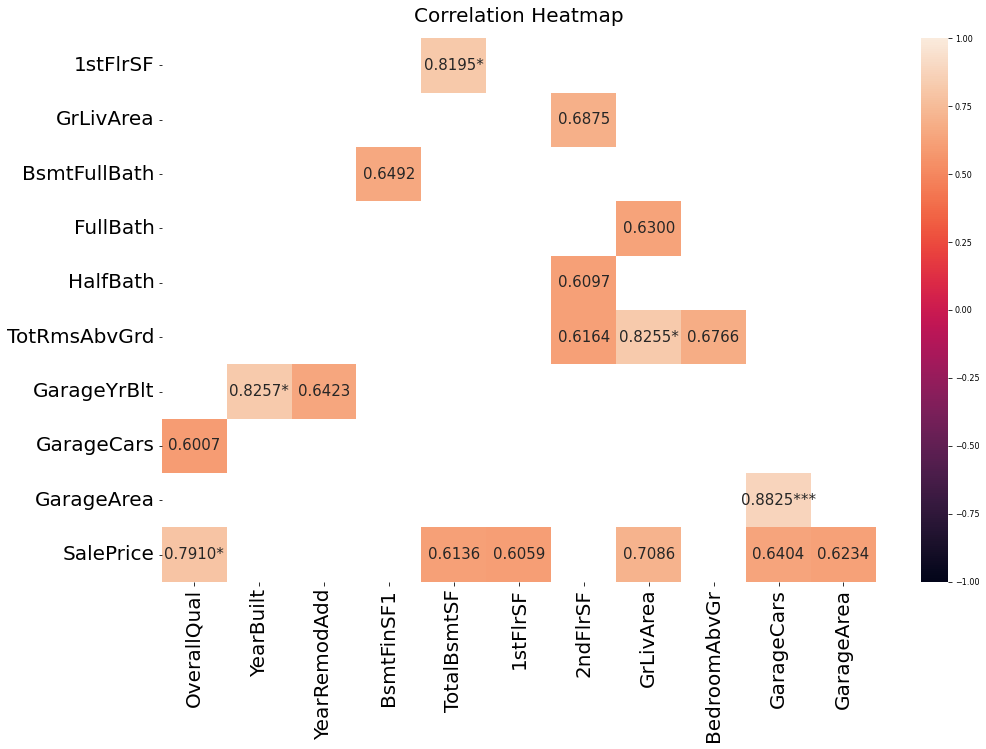

In [17]:
plot_correlation_heatmap(train_data)

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

### Target Variable

In [18]:
# plot the target distribution
def plot_hist(data):
    plt.figure(figsize=(16, 5))
    sns.histplot(data);
    (mu, sigma) = norm.fit(data) # Get the fitted parameters used by the function
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    fig = plt.figure()
    plt.figure(figsize=(16, 5))
    res = stats.probplot(data, plot=plt)
    plt.show()


 mu = 180921.20 and sigma = 79415.29



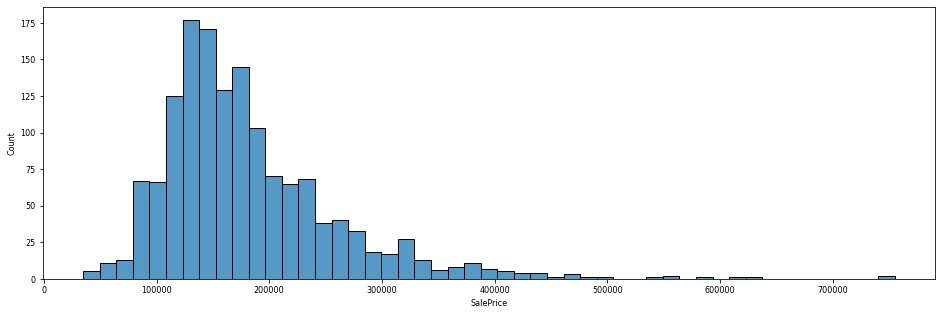

<Figure size 432x288 with 0 Axes>

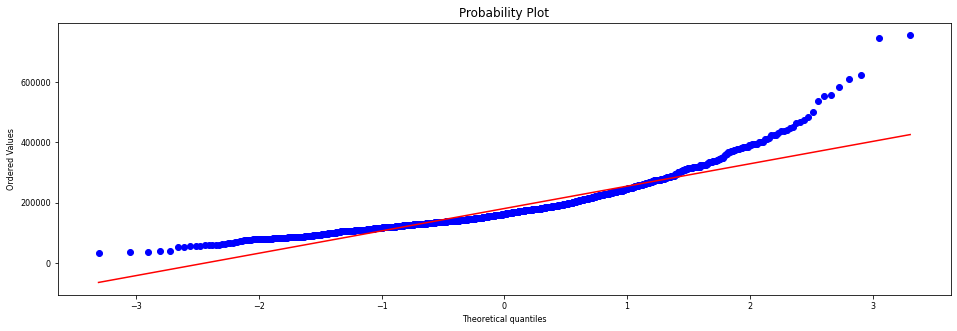

In [19]:
plot_hist(target)

<div class="alert alert-block alert-success">
Comment: <strong>competition loss is RMSLE so we need to log-transform y</strong>
</div>

In [20]:
target = np.log1p(target)


 mu = 12.02 and sigma = 0.40



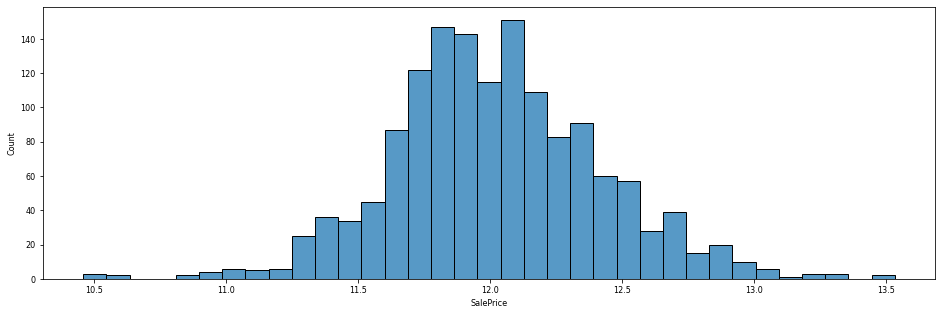

<Figure size 432x288 with 0 Axes>

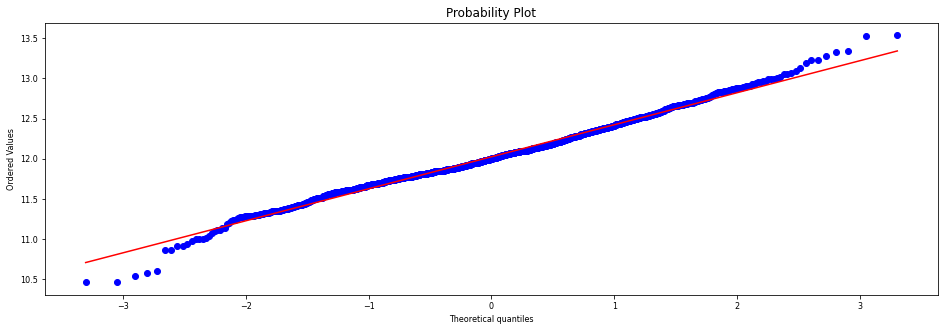

In [21]:
plot_hist(target)

<div class="alert alert-block alert-success">
Comment <strong> </strong>
</div>

#### SalePrice against OverallQual

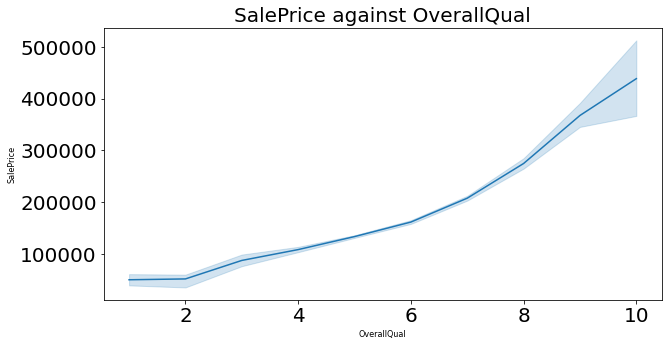

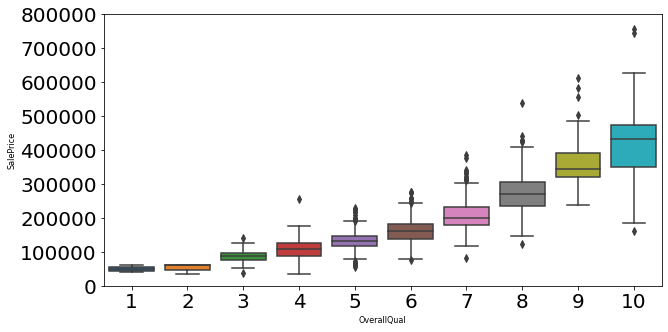

In [22]:
figure = plt.figure(figsize = (10,5))
ax = sns.lineplot(x = 'OverallQual', y = 'SalePrice', data = train_data)
plt.title("SalePrice against OverallQual", fontdict={'fontsize': 20})
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 

#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)

plt.show()

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

In [23]:
corr_predictors = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'GarageCars', 'OverallQual']
# GrLivArea
idxs_GrLivArea = list(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<300000)].index)
# TotalBsmtSF
idxs_TotalBsmtSF = list(train_data[(train_data['TotalBsmtSF']>4000) & (train_data['SalePrice']<300000)].index)
# 1stFlrSF
idxs_1stFlrSF = list(train_data[(train_data['1stFlrSF']>4000) & (train_data['SalePrice']<300000)].index)
# TotalBsmtSF
idxs_GarageArea = list(train_data[(train_data['GarageArea']>1200) & (train_data['SalePrice']<300000)].index)
all_idxs=[idxs_GrLivArea, idxs_TotalBsmtSF, idxs_1stFlrSF, idxs_GarageArea,[] ,[]]

In [24]:
# plot_corr_predictors
def plot_corr_predictors(predictor_names):
    plt.figure(figsize=(20,10))
    
    for count, predictor in enumerate(corr_predictors, start=1):
        plt.subplot(2,3,count)
        ax = sns.scatterplot(x = predictor, y = 'SalePrice', data = train_data)
        ax = sns.scatterplot(x = train_data[predictor][all_idxs[count-1]], y = train_data['SalePrice'][all_idxs[count-1]])
        plt.title("SalePrice against " + predictor, fontdict={'fontsize': 20})

    plt.tight_layout(pad=4.0)
    plt.show()    

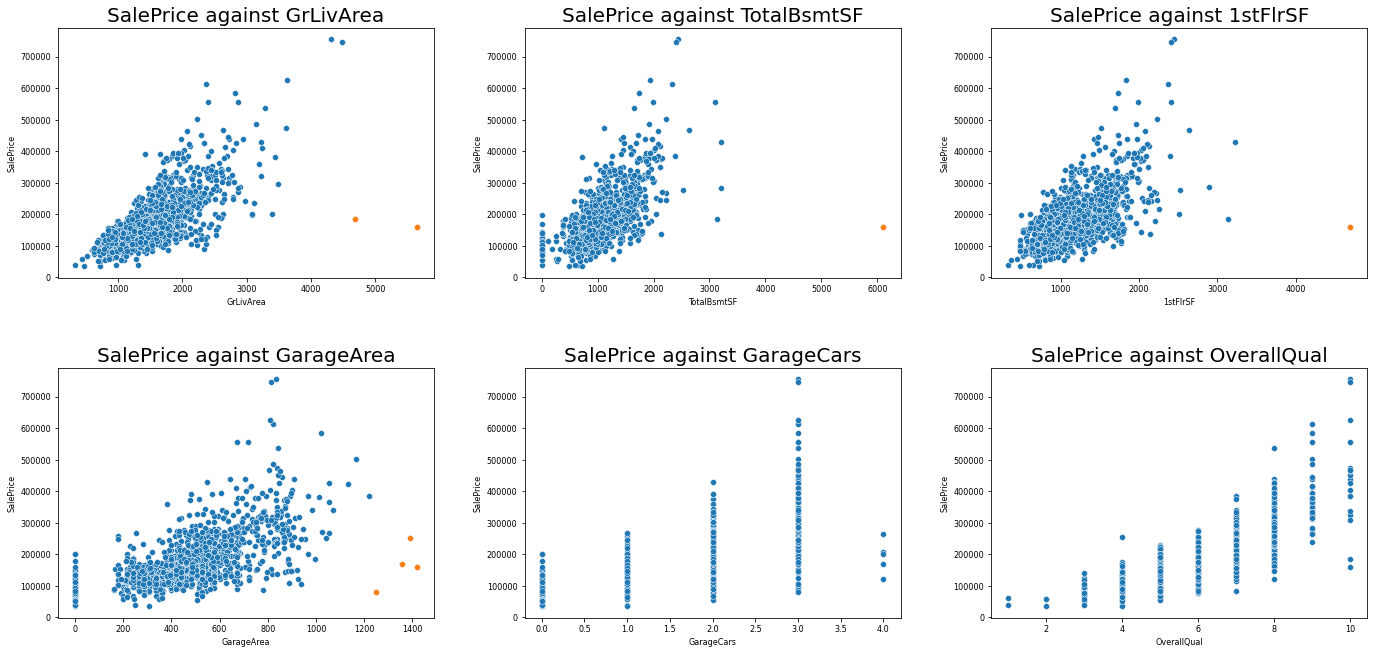

In [25]:
plot_corr_predictors(corr_predictors)

In [26]:
GarageCars_grouped = train_data.groupby('GarageCars')['SalePrice'].mean().reset_index()
OverallQual_grouped = train_data.groupby('OverallQual')['SalePrice'].mean().reset_index()

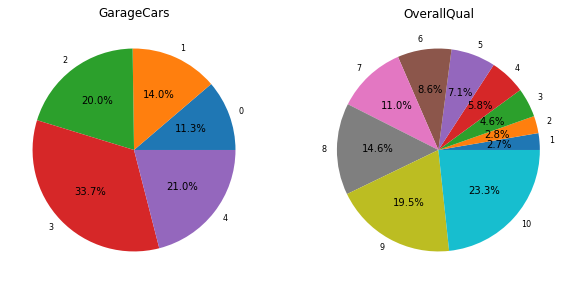

In [27]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(GarageCars_grouped['SalePrice'], labels=GarageCars_grouped['GarageCars'], autopct='%1.1f%%')
ax1.set_title('GarageCars')

ax2.pie(OverallQual_grouped['SalePrice'], labels=OverallQual_grouped['OverallQual'], autopct='%1.1f%%')
ax2.set_title('OverallQual')

# Show the plot
plt.show()

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

### Outliers

In [28]:
Outliers = list(set(idxs_GrLivArea+idxs_TotalBsmtSF+idxs_1stFlrSF+idxs_GarageArea))
Outliers

[1061, 581, 1190, 523, 1298]

<div class="alert alert-block alert-success">
Comment <strong>here</strong>
</div>

<table id=Prepering-Data-for-models style="width:100%">
<tr><td><h1>Prepering Data for models</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

### Feature Scaling

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

#### Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x
 .

Note that setting  λ=0
  is equivalent to log1p used above for the target variable.

See this page for more details on Box Cox Transformation as well as the scipy function's page

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
all_data[skewed_features] = np.log1p(all_data[skewed_features])

### Encoding

In [29]:
# Transforming some numerical variables that are really categorical

#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
#all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

- justify

In [30]:
# Label Encoding some categorical variables that may contain information in their ordering set

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'OverallCond')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print(all_data.shape)

(2919, 79)


In [31]:
#Adding one more important feature
#Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['GrLivArea']

In [32]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 222)


### Splitting the data

In [33]:
ntest = test_data.shape[0]+1 #number of rows in test data
train = all_data.iloc[:ntest, :]
test = all_data.iloc[ntest:, :]
print(train.shape, test.shape)

(1460, 222) (1459, 222)


In [52]:
feature_names = train.columns

In [34]:
train = train.drop(Outliers)
target = target.drop(Outliers)

In [35]:
#removing 'Id' column which is just the DB table index
train_data = train_data.drop('Id',axis=1) 
test_Ids = test_data['Id']
test_data = test_data.drop('Id',axis=1) 

In [36]:
X_train, X_validate, y_train, y_validate = train_test_split(train,target,test_size=0.3,random_state=0)

In [37]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1226,1227,10,86.0,14598,1,1,0,0,6,4,...,0,0,0,1,0,0,0,0,1,0
520,521,4,60.0,10800,1,0,3,0,4,6,...,0,0,0,1,0,0,0,0,1,0
1399,1400,9,51.0,6171,1,1,3,0,6,5,...,0,0,0,1,0,0,0,0,1,0
1395,1396,10,88.0,12665,1,1,0,0,8,4,...,0,0,0,1,0,0,0,0,1,0
726,727,5,70.0,21695,1,1,0,0,6,8,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,766,5,75.0,14587,1,1,0,0,9,4,...,0,1,0,0,0,0,0,0,0,1
837,838,2,21.0,1680,1,1,3,0,6,4,...,0,0,0,1,0,0,0,0,1,0
1220,1221,5,66.0,7800,1,1,0,0,5,4,...,0,0,0,1,1,0,0,0,0,0
560,561,5,72.0,11341,1,1,0,0,5,5,...,0,0,0,1,0,0,0,0,1,0


<table id=-Feature-Selection style="width:100%">
<tr><td><h1>Feature Selection</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

### Ridge-Lasso-Elasticnet

In [46]:
model = make_pipeline(StandardScaler(), SGDRegressor(penalty='l2', random_state=0))
alpha_space = {'alpha': uniform(0, 1)}#np.linspace(0, 1, 100)}
alphas = []
for i in range(30):
    ridge_cv = RandomizedSearchCV(model[1], alpha_space, cv=5)
    ridge_cv.fit(X_train, y_train)
    alphas.append(ridge_cv.best_params_['alpha'])

In [47]:
best_alpha = np.array(alphas).mean()
best_alpha

0.41532093956013216

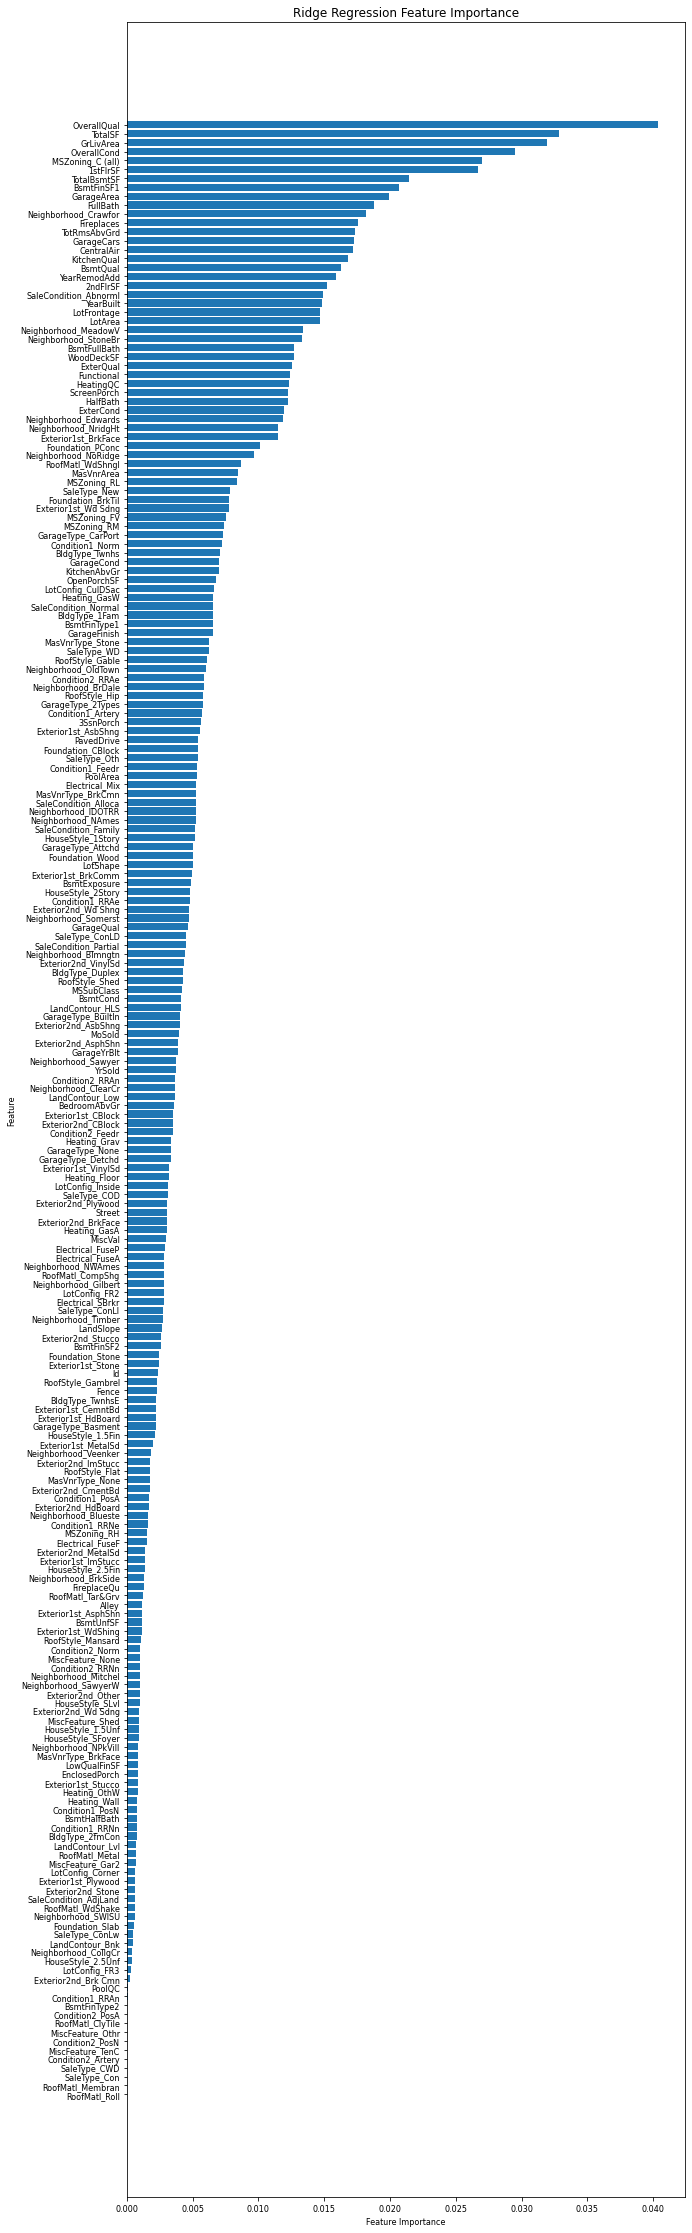

In [54]:
# Train a Ridge Regression model
ridge = make_pipeline(StandardScaler(), SGDRegressor(penalty='l2', alpha = best_alpha ,random_state=0))
ridge.fit(X_train, y_train)

# Plot the feature importances
coef = ridge[1].coef_
features = feature_names
importance = np.abs(coef)
sorted_idx = np.argsort(importance)

plt.figure(figsize=(10,40))
plt.barh(range(train.shape[1]), importance[sorted_idx])
plt.yticks(range(train.shape[1]), features[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Ridge Regression Feature Importance")
plt.show()
ridge_features = features[sorted_idx]

In [55]:
most = ridge_features[::-1]

In [56]:
ridge_most = X_train[most[:50]]

In [57]:
ridge_most.shape

(1018, 50)

<div class="alert alert-block alert-warning">
<h1><b>example:</b> </h1>
</div>


In [58]:
model = make_pipeline(StandardScaler(), SGDRegressor(penalty='l2',alpha=best_alpha, random_state=0))
scores = cross_val_score(model, ridge_most, y_train, cv=15)
print(f"{scores.mean():.3f} (+/- {scores.std():.3f})")

0.918 (+/- 0.015)


### Trees

<AxesSubplot:>

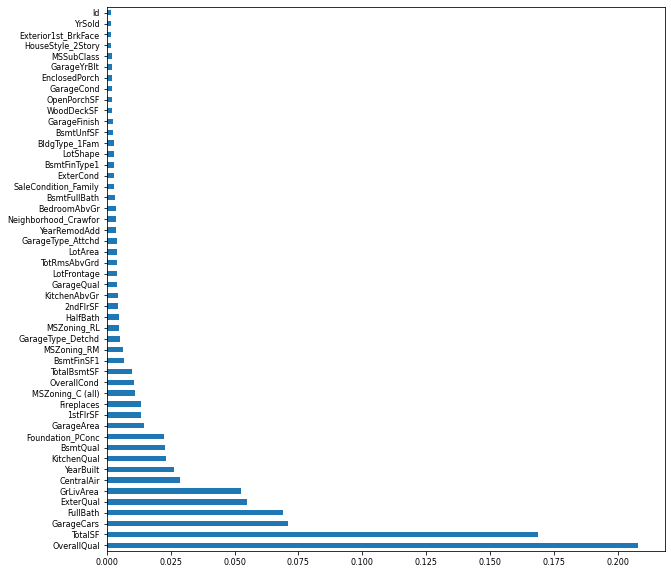

In [59]:
model = ExtraTreesRegressor()
model.fit(X_train, y_train)
plt.figure(figsize=(10, 10))
feature_rank = pd.Series(model.feature_importances_, index = feature_names)
feature_rank.nlargest(50).plot(kind = "barh")

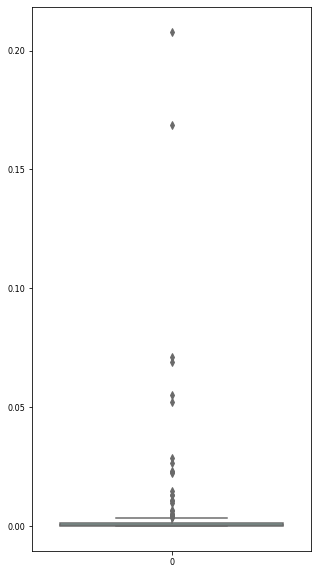

In [61]:
plt.figure(figsize=(5,10))
sns.boxplot(data=feature_rank,palette="Set3")
plt.show()

In [62]:
tree_select = feature_rank.sort_values(ascending=False)[:50]
tree_select.index

Index(['OverallQual', 'TotalSF', 'GarageCars', 'FullBath', 'ExterQual',
       'GrLivArea', 'CentralAir', 'YearBuilt', 'KitchenQual', 'BsmtQual',
       'Foundation_PConc', 'GarageArea', '1stFlrSF', 'Fireplaces',
       'MSZoning_C (all)', 'OverallCond', 'TotalBsmtSF', 'BsmtFinSF1',
       'MSZoning_RM', 'GarageType_Detchd', 'MSZoning_RL', 'HalfBath',
       '2ndFlrSF', 'KitchenAbvGr', 'GarageQual', 'LotFrontage', 'TotRmsAbvGrd',
       'LotArea', 'GarageType_Attchd', 'YearRemodAdd', 'Neighborhood_Crawfor',
       'BedroomAbvGr', 'BsmtFullBath', 'SaleCondition_Family', 'ExterCond',
       'BsmtFinType1', 'LotShape', 'BldgType_1Fam', 'BsmtUnfSF',
       'GarageFinish', 'WoodDeckSF', 'OpenPorchSF', 'GarageCond',
       'EnclosedPorch', 'GarageYrBlt', 'MSSubClass', 'HouseStyle_2Story',
       'Exterior1st_BrkFace', 'YrSold', 'Id'],
      dtype='object')

In [63]:
tree_most = X_train[tree_select.index]

In [64]:
tree_most.shape

(1018, 50)

<div class="alert alert-block alert-warning">
<h1><b>example:</b> </h1>
</div>


In [ ]:
model = make_pipeline(StandardScaler(), SGDRegressor(penalty='l2',alpha=best_alpha, random_state=0))
scores = cross_val_score(model, tree_most, y_train, cv=15)
print(f"{scores.mean():.3f} (+/- {scores.std():.3f})")

### PCA

<div class="alert alert-block alert-warning">
<h1><b>to do:</b> Look at the referrence and redo..</h1>
</div>


In [ ]:
# Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_train)

# Get the loadings (coefficients) of the features in the principal components
loadings = pca.components_.T

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"], index=feature_names)

# Sort the loadings by the magnitude of the coefficients
loadings_df["abs_loadings"] = np.abs(loadings_df.max(axis=1))
loadings_df = loadings_df.sort_values("abs_loadings", ascending=False)
top_30 = loadings_df[:30]
# Plot a bar graph of the feature names versus the loadings
plt.figure(figsize=(10,10))
plt.barh(top_30.index, top_30["abs_loadings"], align='center')
plt.xlabel('Absolute Loading Value')
plt.ylabel('Feature')
plt.title('Feature Importance (PCA)')
plt.show()

In [ ]:
top_30.index

In [ ]:
PCA_df = train[top_30.index]

<table id=SGD-Model style="width:100%">
<tr><td><h1>SGD Model</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
<td><h2>Using Ridge, Lasso, and Elasticnet regulariztions</h2></td><td></td>
</table>

### SGD - Tune Hyper Parameters

In [ ]:
# Define the parameter distribution for random search
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5],
}

# Create an instance of the SGDRegressor class
sgd = make_pipeline(StandardScaler(), SGDRegressor())

# Run the random search with 5-fold cross-validation   
random_search = RandomizedSearchCV(sgd[1], param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", random_search.best_params_)

In [ ]:
sgd = make_pipeline(StandardScaler(), SGDRegressor(penalty= 'l1', max_iter= 1000, alpha= 0.10))
scores = cross_val_score(sgd, X_train, y_train, cv=15)
print(f"{scores.mean():.3f} (+/- {scores.std():.3f})")


### SGD - Evaluating on Validation set

In [ ]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    rmse= np.sqrt(-cross_val_score(model, X_validate, y_validate, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
rmsle_cv(sgd)

### SGD - Model Submission 

In [ ]:
def Submission(name, model):
    model.fit(train, target)
    predictions = np.exp(model.predict(test))
    output = pd.DataFrame({'Id': test_Ids, 'SalePrice': predictions})
    file_name = name + '_submission.csv'
    output.to_csv(file_name, index=False)
    return predictions

In [ ]:
pred1 = Submission('sgd', sgd)

In [ ]:
sns.histplot(pred)

In [ ]:
sns.histplot(pred1)

<table id=Random-Forest-Model style="width:100%">
<tr><td><h1>Random Forest Model</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

### RF - Tune Hyper Parameters

### RF - Evaluating on Validation set

### RF - Model Submission

<table id=lin-reg style="width:100%">
<tr><td><h1>Linear Regression Model</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
<td><h2>Using polynomial features</h2></td><td></td>
</table>

### LR - Tune Hyper Parameters

### LR - Evaluating on Validation set 

### LR - Submission

<table id=Ensemble-of-the-Models style="width:100%">
<tr><td><h1>Ensemble of the Models</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

### Create Ensemble

### Evaluating on Validation set

<table id=Final-Submission style="width:100%">
<tr><td><h1>Final Submission</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

<table id=Conclusions style="width:100%">
<tr><td><h1>Conclusions</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

- improving modules
- learned from others
- tip of the iceberg


<table id=References style="width:100%">
<tr><td><h1>References</h1></td><td><a href="#header"><img src="https://30percentclub.org/wp-content/uploads/2021/07/back-to-top-icon-01.svg" width="70" height="70" align="right"></a></td></tr>
</table>

Main:
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


PCA:
https://www.kaggle.com/code/willkoehrsen/introduction-to-feature-selection

preprocessing, , heatmap, PCA, submission:
https://www.kaggle.com/code/ryanholbrook/feature-engineering-for-house-prices

Ensemble:
https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition


https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

submission example: 
https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook

Missing Data refference from: 
https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

heatmap:
https://stackoverflow.com/questions/66171071/how-to-restrict-a-correlation-heatmap-to-interesting-cells-and-add-stars-to-mark

https://stackoverflow.com/questions/71350386/how-to-change-the-font-labels-of-heatmap

outliers:
https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff

https://chat.openai.com/chat

https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/

https://realpython.com/python-enumerate/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

https://www.w3schools.com/


https://unicode.org/emoji/charts/full-emoji-list.html